In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
import utils 


## **Monetary Aggregates in the Euro Area**

1. **Monetary Aggregate M3**  
   - Reported by MFIs (Monetary Financial Institutions), central government, and post office giro institutions in the euro area (stocks).  
   - Euro area (changing composition).  
   - Data reported on a **monthly** basis.  
   - **Neither seasonally nor working day adjusted**.

2. **Monetary Aggregate M2**  
   - Reported by MFIs, central government, and post office giro institutions in the euro area (transactions).  
   - Euro area (changing composition).  
   - Data reported on a **monthly** basis.  
   - **Neither seasonally nor working day adjusted**.

3. **Monetary Aggregate M1**  
   - Reported by MFIs, central government, and post office giro institutions in the euro area (transactions).  
   - Euro area (changing composition).  
   - Data reported on a **monthly** basis.  
   - **Neither seasonally nor working day adjusted**.


In [12]:
m3 = pd.read_csv('/Users/emirysaglam/GitHub/Bitirme2/ECB Data Portal_20250301215115.csv')
m3

,DATE,TIME PERIOD,"Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.N.V.M30.X.1.U2.2300.Z01.E)"
0,1980-01-31,1980Jan,1107100
1,1980-02-29,1980Feb,1107384
2,1980-03-31,1980Mar,1119526
3,1980-04-30,1980Apr,1121677
4,1980-05-31,1980May,1127563
...,...,...,...
536,2024-09-30,2024Sep,16527365
537,2024-10-31,2024Oct,16548435
538,2024-11-30,2024Nov,16732694
539,2024-12-31,2024Dec,16807105


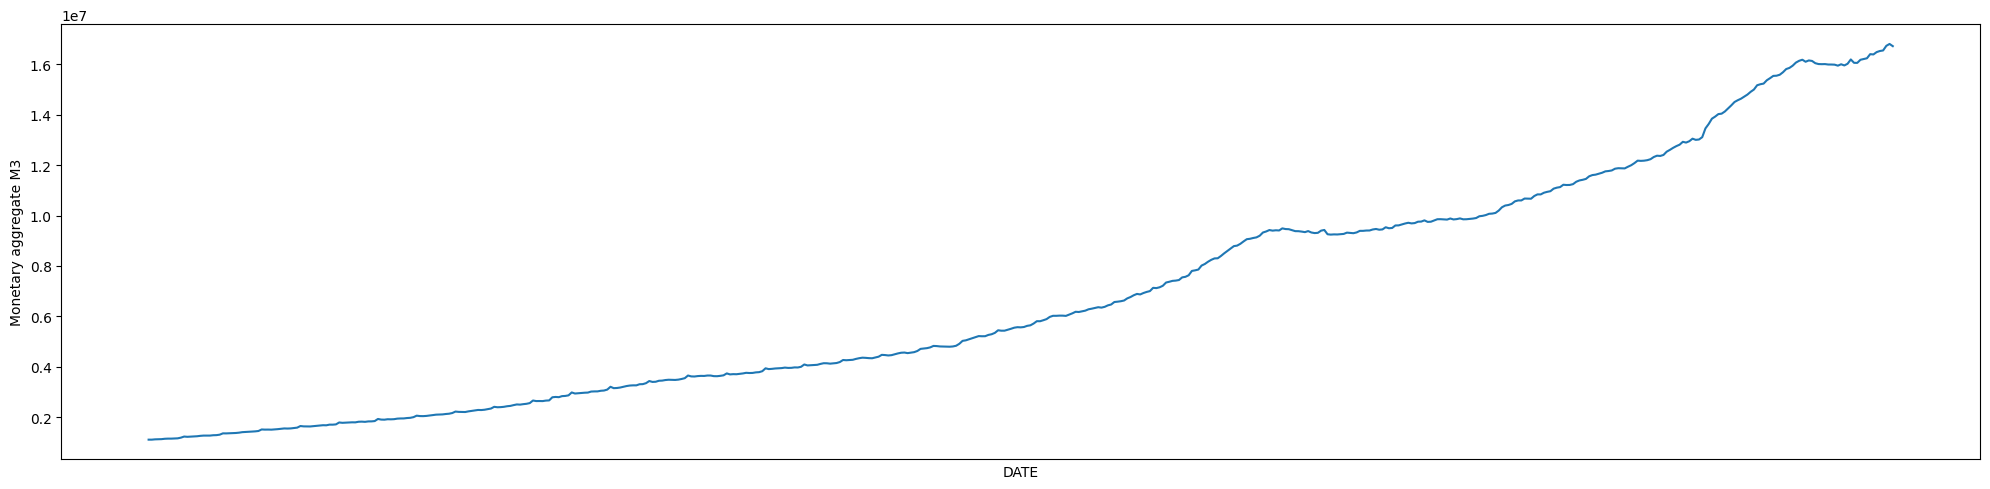

In [ ]:
fig = plt.subplots(figsize=(20, 5))

sns.lineplot(data=m3, x="DATE", y="Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.N.V.M30.X.1.U2.2300.Z01.E)")
plt.ylabel("Monetary aggregate M3")
plt.xticks([])
plt.show()



In [14]:

m2 = pd.read_csv('/Users/emirysaglam/GitHub/Bitirme2/ECB Data Portal_20250301215125.csv')
m2

,DATE,TIME PERIOD,"Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M20.X.4.U2.2300.Z01.E)"
0,1980-02-29,1980Feb,-257
1,1980-03-31,1980Mar,10039
2,1980-04-30,1980Apr,2006
3,1980-05-31,1980May,5559
4,1980-06-30,1980Jun,14423
...,...,...,...
535,2024-09-30,2024Sep,53409
536,2024-10-31,2024Oct,-26832
537,2024-11-30,2024Nov,169099
538,2024-12-31,2024Dec,86966


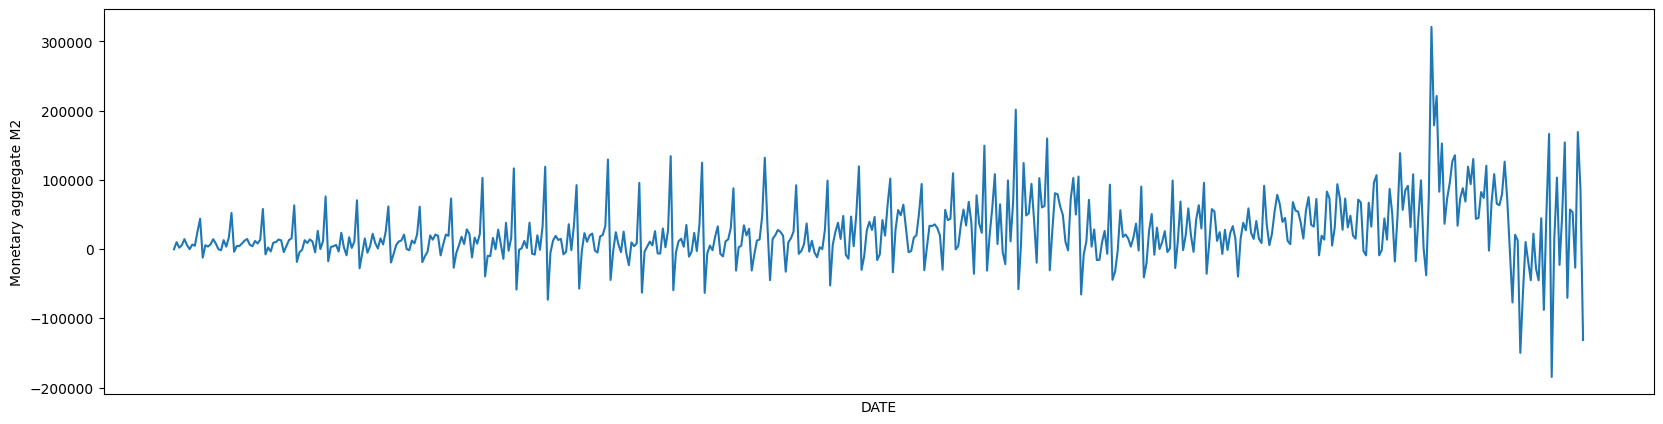

In [28]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(data=m2, x="DATE", y="Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M20.X.4.U2.2300.Z01.E)")
plt.ylabel("Monetary aggregate M2")
plt.xticks([])
plt.show()


In [16]:

m1 = pd.read_csv('/Users/emirysaglam/GitHub/Bitirme2/ECB Data Portal_20250301215120.csv')
m1

,DATE,TIME PERIOD,"Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M10.X.4.U2.2300.Z01.E)"
0,1980-02-29,1980Feb,-4779
1,1980-03-31,1980Mar,7777
2,1980-04-30,1980Apr,1095
3,1980-05-31,1980May,3340
4,1980-06-30,1980Jun,14880
...,...,...,...
535,2024-09-30,2024Sep,27400
536,2024-10-31,2024Oct,-11327
537,2024-11-30,2024Nov,186955
538,2024-12-31,2024Dec,64125


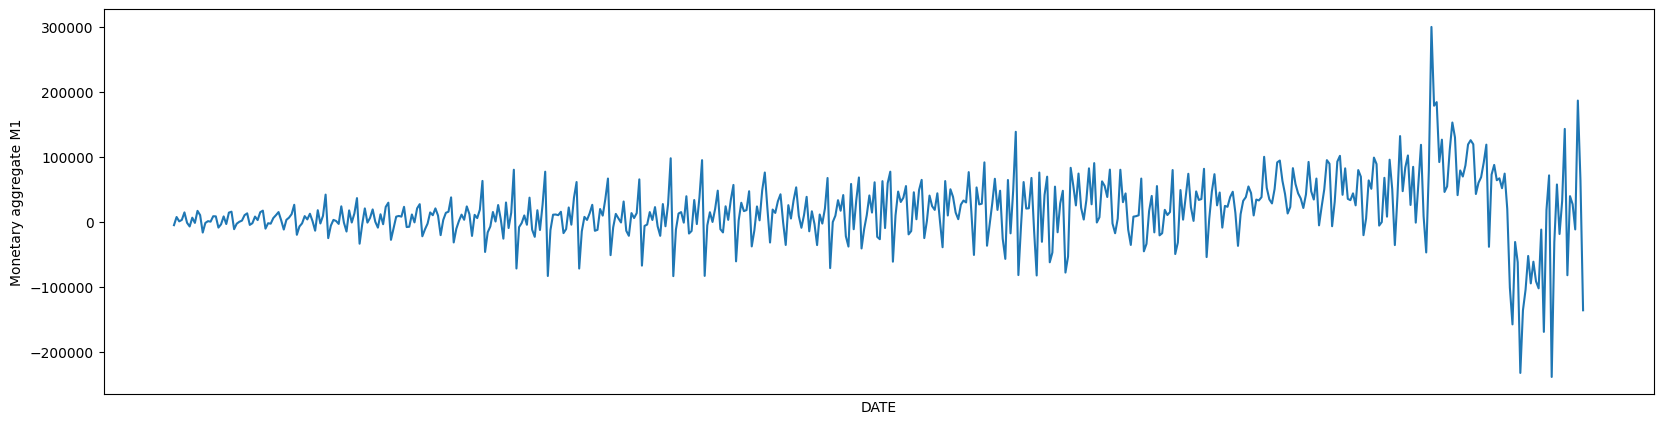

In [29]:
fig = plt.subplots(figsize=(20, 5))

sns.lineplot(data=m1, x="DATE", y="Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M10.X.4.U2.2300.Z01.E)")
plt.ylabel("Monetary aggregate M1")
plt.xticks([])
plt.show()




In [18]:
m1_re = utils.ecb_reshape(m1,'M1')
m2_re = utils.ecb_reshape(m2,'M2')
m3_re = utils.ecb_reshape(m3,'M3')

df_merged = m1_re.merge(m2_re, on="DATE", how="outer").merge(m3_re, on="DATE", how="outer")
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"]).dt.to_period("M")


df_merged["GEO"] = "EU"
df_merged

,DATE,M1,M2,M3,GEO
0,1980-01,NaN,NaN,1107100,EU
1,1980-02,-4779.0,-257.0,1107384,EU
2,1980-03,7777.0,10039.0,1119526,EU
3,1980-04,1095.0,2006.0,1121677,EU
4,1980-05,3340.0,5559.0,1127563,EU
...,...,...,...,...,...
536,2024-09,27400.0,53409.0,16527365,EU
537,2024-10,-11327.0,-26832.0,16548435,EU
538,2024-11,186955.0,169099.0,16732694,EU
539,2024-12,64125.0,86966.0,16807105,EU


In [17]:
df_merged

,DATE,M1,M2,M3,GEO
0,1980-01,NaN,NaN,1107100,EU
1,1980-02,-4779.0,-257.0,1107384,EU
2,1980-03,7777.0,10039.0,1119526,EU
3,1980-04,1095.0,2006.0,1121677,EU
4,1980-05,3340.0,5559.0,1127563,EU
...,...,...,...,...,...
536,2024-09,27400.0,53409.0,16527365,EU
537,2024-10,-11327.0,-26832.0,16548435,EU
538,2024-11,186955.0,169099.0,16732694,EU
539,2024-12,64125.0,86966.0,16807105,EU


## **Writing to DB**

In [13]:
# You can also use the `from_df` function for direct insertion:
# con.from_df(df, "my_table")
con = duckdb.connect("data.db")



In [18]:
#df_merged.reset_index(inplace=True)
df_merged["DATE"] = df_merged["DATE"].astype(str)
df_merged["M1"] = df_merged["M1"].astype(float)
df_merged["M2"] = df_merged["M2"].astype(float)
df_merged["M3"] = df_merged["M3"].astype(float)

In [19]:
df_merged.dtypes.to_dict()

{'DATE': dtype('O'),
 'M1': dtype('float64'),
 'M2': dtype('float64'),
 'M3': dtype('float64'),
 'GEO': dtype('O')}

In [20]:
df_merged

,DATE,M1,M2,M3,GEO
0,1980-01,NaN,NaN,1107100.0,EU
1,1980-02,-4779.0,-257.0,1107384.0,EU
2,1980-03,7777.0,10039.0,1119526.0,EU
3,1980-04,1095.0,2006.0,1121677.0,EU
4,1980-05,3340.0,5559.0,1127563.0,EU
...,...,...,...,...,...
536,2024-09,27400.0,53409.0,16527365.0,EU
537,2024-10,-11327.0,-26832.0,16548435.0,EU
538,2024-11,186955.0,169099.0,16732694.0,EU
539,2024-12,64125.0,86966.0,16807105.0,EU


In [21]:
con.execute("DROP TABLE ecb")


In [22]:

con.execute("CREATE TABLE ecb AS SELECT * FROM df_merged")



# Verify the data was written to the database
con.sql("SELECT * FROM ecb").df()         # Pandas DataFrame




,DATE,M1,M2,M3,GEO
0,1980-01,NaN,NaN,1107100.0,EU
1,1980-02,-4779.0,-257.0,1107384.0,EU
2,1980-03,7777.0,10039.0,1119526.0,EU
3,1980-04,1095.0,2006.0,1121677.0,EU
4,1980-05,3340.0,5559.0,1127563.0,EU
...,...,...,...,...,...
536,2024-09,27400.0,53409.0,16527365.0,EU
537,2024-10,-11327.0,-26832.0,16548435.0,EU
538,2024-11,186955.0,169099.0,16732694.0,EU
539,2024-12,64125.0,86966.0,16807105.0,EU


In [23]:
# Close the connection
con.close()